In [1]:
import pandas as pd
from pandas import merge
import numpy as np
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

### 정상 데이터 불러오기

In [2]:
import glob,os

files = glob.glob('data/*.csv')
print(files)

['data\\t_TC_112_1.csv', 'data\\t_TC_112_2.csv', 'data\\t_TC_114_1.csv', 'data\\t_TC_115_1.csv', 'data\\t_TC_115_2.csv', 'data\\t_TC_115_3.csv', 'data\\t_TC_117_2.csv', 'data\\t_TC_117_3.csv', 'data\\t_TC_162A_1.csv', 'data\\t_TC_162A_2.csv', 'data\\t_TC_162A_3.csv', 'data\\t_TC_162A_4.csv', 'data\\t_TC_162A_5.csv', 'data\\t_TC_162A_6.csv', 'data\\t_TC_162B_1.csv', 'data\\t_TC_162B_2.csv', 'data\\t_TC_162B_3.csv', 'data\\t_TC_162B_4.csv', 'data\\t_TC_162B_5.csv', 'data\\t_TC_162B_6.csv', 'data\\t_TC_303_1.csv', 'data\\t_TC_303_2.csv', 'data\\t_TC_304_1.csv', 'data\\t_TC_304_3.csv', 'data\\t_TC_304_4.csv', 'data\\t_TC_305_1.csv', 'data\\t_TC_305_2.csv', 'data\\t_TC_305_3.csv', 'data\\t_TC_305_4.csv', 'data\\t_TC_306_1.csv', 'data\\t_TC_306_2.csv', 'data\\t_TC_306_3.csv', 'data\\t_TC_306_4.csv', 'data\\t_TC_309_1.csv', 'data\\t_TC_309_10.csv', 'data\\t_TC_309_2.csv', 'data\\t_TC_309_3.csv', 'data\\t_TC_309_4.csv', 'data\\t_TC_309_5.csv', 'data\\t_TC_309_6.csv', 'data\\t_TC_309_7.csv', 'd

In [3]:
dff = pd.concat([pd.read_csv(f).assign(f_name=os.path.basename(f).split('t_')[1].split('.')[0]) for f in files])
print(dff)

       Unnamed: 0  time  current  voltage  name       f_name
0               1   434     8403     2059     1     TC_112_1
1               2   453     8380     2030     2     TC_112_1
2               3   453     8390     2041     3     TC_112_1
3               4   451     8382     2003     4     TC_112_1
4               5   288     8154     1524     5     TC_112_1
5               6   291     8157     1551     6     TC_112_1
6               7   286     8245     1541     7     TC_112_1
7               8   583     8480     2541     8     TC_112_1
8               9   448     8384     1857     9     TC_112_1
9              10   442     8383     1989    10     TC_112_1
10             11   453     8396     1972    11     TC_112_1
11             12   441     8392     1980    12     TC_112_1
12             13   447     8401     1960    13     TC_112_1
13             14   311     8240     1972    14     TC_112_1
14             15   363     7770     1640    15     TC_112_1
15             16   369 

In [4]:
dff.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
dff = dff.rename(columns={'time':'weld_time','name':'weld_point','f_name':'robot_name'})
dff.head()

weld_time  current  voltage  weld_point robot_name
0        434     8403     2059           1   TC_112_1
1        453     8380     2030           2   TC_112_1
2        453     8390     2041           3   TC_112_1
3        451     8382     2003           4   TC_112_1
4        288     8154     1524           5   TC_112_1

In [6]:
dff['category'] = 0

In [7]:
dff.shape

(10022802, 6)

In [8]:
dff = dff[dff['current']>=2000]

In [9]:
dff.shape

(9938661, 6)

In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9938661 entries, 0 to 91784
Data columns (total 6 columns):
weld_time     int64
current       int64
voltage       int64
weld_point    int64
robot_name    object
category      int64
dtypes: int64(5), object(1)
memory usage: 530.8+ MB


In [11]:
dff.isnull().sum()

weld_time     0
current       0
voltage       0
weld_point    0
robot_name    0
category      0
dtype: int64

### 실험데이터 불러오기 (정상 + 비정상 조건 실험데이터)

### 2겹 1mm 비정상 조건 데이터 구조 확인

In [12]:
lyr2_1mm_abno = pd.read_csv('2layer_1mm_abno_condition.csv',sep = '\t')
lyr2_1mm_abno.head()

Consecutive archive number  Name of the component            Module name  \
0                         179                    NaN  /ROBOTICS_in MDT/TEST   
1                         178                    NaN  /ROBOTICS_in MDT/TEST   
2                         177                    NaN  /ROBOTICS_in MDT/TEST   
3                         176                    NaN  /ROBOTICS_in MDT/TEST   
4                         175                    NaN  /ROBOTICS_in MDT/TEST   

  Date of the welding Time of the welding  Spot counter  Current program  \
0          2019-09-16            14:55:44            50                0   
1          2019-09-16            14:55:26            49                0   
2          2019-09-16            14:55:04            48                0   
3          2019-09-16            14:54:42            47                0   
4          2019-09-16            14:54:22            46                0   

   Component number of the produced component  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Overall welding status of the component  Current spot  ...  \
0                                      NaN             0  ...   
1                                      NaN             0  ...   
2                                      NaN             0  ...   
3                                      NaN             0  ...   
4                                      NaN             0  ...   

  Actual current time Lead time  Dwell time  Control mode  Energy  \
0                 362         0           0             4    2846   
1                 362         0           0             4    3582   
2                 362         0           0             4    3586   
3                 362         0           0             4    3570   
4                 362         0           0             4    3498   

   Q-Inspector aktive  Q-Inspector: spot value  \
0                   1                        0   
1                   1                        0   
2                   1                        0   
3                   1                        0   
4                   1                        0   

   Q-Inspector: Message threshold for spot value  Spatter time point  \
0                                              0                 off   
1                                              0                 off   
2                                              0                 off   
3                                              0                 off   
4                                              0                 off   

     Archive ID  
0  2.019090e+16  
1  2.019090e+16  
2  2.019090e+16  
3  2.019090e+16  
4  2.019090e+16  

[5 rows x 25 columns]

In [13]:
lyr2_1mm_abno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 25 columns):
Consecutive archive number                       9 non-null int64
Name of the component                            0 non-null float64
Module name                                      9 non-null object
Date of the welding                              9 non-null object
Time of the welding                              9 non-null object
Spot counter                                     9 non-null int64
Current program                                  9 non-null int64
Component number of the produced component       0 non-null float64
Overall welding status of the component          0 non-null float64
Current spot                                     9 non-null int64
Welding spot status                              9 non-null object
Gun name                                         9 non-null object
Current gun                                      9 non-null int64
Average act. current          

### 비정상조건 전체 불러오기

In [14]:
lyr2_1mm_abno = pd.read_csv('2layer_1mm_abno_condition.csv',sep = '\t')
lyr2_2mm_abno = pd.read_csv('2layer_2mm_abno_condition.csv',sep = '\t')
lyr2_slr_abno = pd.read_csv('2layer_sealer_abno_condition.csv',sep = '\t')
lyr3_1mm_abno = pd.read_csv('3layer_1mm_abno_condition.csv',sep = '\t')
lyr3_2mm_abno = pd.read_csv('3layer_2mm_abno_condition.csv',sep = '\t')
lyr3_slr_abno = pd.read_csv('3layer_sealer_abno_condition.csv',sep = '\t')
lyr4_2mm_abno = pd.read_csv('4layer_1mm_abno_condition.csv',sep = '\t')
lyr4_2mm_abno = pd.read_csv('4layer_2mm_abno_condition.csv',sep = '\t')
lyr4_slr_abno = pd.read_csv('4layer_sealer_abno_condition.csv',sep = '\t')

In [15]:
lyr2_1mm_abno['condition'] = 'lyr2_1mm_abno'
lyr2_2mm_abno['condition'] = 'lyr2_2mm_abno'
lyr2_slr_abno['condition'] = 'lyr2_slr_abno'
lyr3_1mm_abno['condition'] = 'lyr3_1mm_abno'
lyr3_2mm_abno['condition'] = 'lyr3_2mm_abno'
lyr3_slr_abno['condition'] = 'lyr3_slr_abno'
lyr4_2mm_abno['condition'] = 'lyr4_2mm_abno'
lyr4_2mm_abno['condition'] = 'lyr4_2mm_abno'
lyr4_slr_abno['condition'] = 'lyr4_slr_abno'

In [16]:
df_abno = pd.concat([lyr2_1mm_abno,lyr2_2mm_abno,lyr2_slr_abno,lyr3_1mm_abno,lyr3_2mm_abno,
                     lyr3_slr_abno,lyr4_2mm_abno,lyr4_2mm_abno,lyr4_slr_abno,])

In [17]:
df_abno.reset_index(drop=True)
df_abno.head()

Consecutive archive number  Name of the component            Module name  \
0                         179                    NaN  /ROBOTICS_in MDT/TEST   
1                         178                    NaN  /ROBOTICS_in MDT/TEST   
2                         177                    NaN  /ROBOTICS_in MDT/TEST   
3                         176                    NaN  /ROBOTICS_in MDT/TEST   
4                         175                    NaN  /ROBOTICS_in MDT/TEST   

  Date of the welding Time of the welding  Spot counter  Current program  \
0          2019-09-16            14:55:44            50                0   
1          2019-09-16            14:55:26            49                0   
2          2019-09-16            14:55:04            48                0   
3          2019-09-16            14:54:42            47                0   
4          2019-09-16            14:54:22            46                0   

   Component number of the produced component  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Overall welding status of the component  Current spot  ... Lead time  \
0                                      NaN             0  ...         0   
1                                      NaN             0  ...         0   
2                                      NaN             0  ...         0   
3                                      NaN             0  ...         0   
4                                      NaN             0  ...         0   

  Dwell time  Control mode  Energy  Q-Inspector aktive  \
0          0             4    2846                   1   
1          0             4    3582                   1   
2          0             4    3586                   1   
3          0             4    3570                   1   
4          0             4    3498                   1   

   Q-Inspector: spot value  Q-Inspector: Message threshold for spot value  \
0                        0                                              0   
1                        0                                              0   
2                        0                                              0   
3                        0                                              0   
4                        0                                              0   

   Spatter time point    Archive ID      condition  
0                 off  2.019090e+16  lyr2_1mm_abno  
1                 off  2.019090e+16  lyr2_1mm_abno  
2                 off  2.019090e+16  lyr2_1mm_abno  
3                 off  2.019090e+16  lyr2_1mm_abno  
4                 off  2.019090e+16  lyr2_1mm_abno  

[5 rows x 26 columns]

In [18]:
df_abno.columns

Index(['Consecutive archive number', 'Name of the component', 'Module name',
       'Date of the welding', 'Time of the welding', 'Spot counter',
       'Current program', 'Component number of the produced component',
       'Overall welding status of the component', 'Current spot',
       'Welding spot status', 'Gun name', 'Current gun',
       'Average act. current', 'Average actual voltage of electrodes',
       'Actual current time', 'Lead time', 'Dwell time', 'Control mode',
       'Energy', 'Q-Inspector aktive', 'Q-Inspector: spot value',
       'Q-Inspector: Message threshold for spot value', 'Spatter time point',
       'Archive ID', 'condition'],
      dtype='object')

In [19]:
df1 = df_abno[['Average act. current','Average actual voltage of electrodes',
               'Actual current time','Energy','condition']]
df1.head()

Average act. current  Average actual voltage of electrodes  \
0                  7147                                  1208   
1                  7181                                  1297   
2                  7175                                  1299   
3                  7200                                  1296   
4                  7187                                  1298   

   Actual current time  Energy      condition  
0                  362    2846  lyr2_1mm_abno  
1                  362    3582  lyr2_1mm_abno  
2                  362    3586  lyr2_1mm_abno  
3                  362    3570  lyr2_1mm_abno  
4                  362    3498  lyr2_1mm_abno

In [20]:
df1 = df1.rename(columns = {'Average act. current':'current','Average actual voltage of electrodes':'voltage',
                            'Actual current time':'weld_time'})
df1.head()

current  voltage  weld_time  Energy      condition
0     7147     1208        362    2846  lyr2_1mm_abno
1     7181     1297        362    3582  lyr2_1mm_abno
2     7175     1299        362    3586  lyr2_1mm_abno
3     7200     1296        362    3570  lyr2_1mm_abno
4     7187     1298        362    3498  lyr2_1mm_abno

### 정상조건 전체 불러오기

In [21]:
lyr2_nor = pd.read_csv('2layer_normal_condition.csv',sep = '\t')
lyr3_nor = pd.read_csv('3layer_normal_condition.csv',sep = '\t')
lyr4_nor = pd.read_csv('4layer_normal_condition.csv',sep = '\t')

In [22]:
lyr2_nor['condition'] = 'lyr2_nor'
lyr3_nor['condition'] = 'lyr3_nor'
lyr4_nor['condition'] = 'lyr4_nor'

In [23]:
df_nor = pd.concat([lyr2_nor,lyr3_nor,lyr4_nor])

In [24]:
df_nor.reset_index(drop=True)
df_nor.head()

Consecutive archive number  Name of the component            Module name  \
0                          94                    NaN  /ROBOTICS_in MDT/TEST   
1                          93                    NaN  /ROBOTICS_in MDT/TEST   
2                          92                    NaN  /ROBOTICS_in MDT/TEST   
3                          91                    NaN  /ROBOTICS_in MDT/TEST   
4                          90                    NaN  /ROBOTICS_in MDT/TEST   

  Date of the welding Time of the welding  Spot counter  Current program  \
0          2019-09-16            13:50:04            28                0   
1          2019-09-16            13:49:47            27                0   
2          2019-09-16            13:49:33            26                0   
3          2019-09-16            13:49:18            25                0   
4          2019-09-16            13:49:03            24                0   

   Component number of the produced component  \
0                                         NaN   
1                                         NaN   
2                                         NaN   
3                                         NaN   
4                                         NaN   

   Overall welding status of the component  Current spot  ... Lead time  \
0                                      NaN             0  ...         0   
1                                      NaN             0  ...         0   
2                                      NaN             0  ...         0   
3                                      NaN             0  ...         0   
4                                      NaN             0  ...         0   

  Dwell time  Control mode  Energy  Q-Inspector aktive  \
0          0             4    3060                   1   
1          0             4    3710                   1   
2          0             4    2728                   1   
3          0             4    3600                   1   
4          0             4    2946                   1   

   Q-Inspector: spot value  Q-Inspector: Message threshold for spot value  \
0                        0                                              0   
1                        0                                              0   
2                        0                                              0   
3                        0                                              0   
4                        0                                              0   

   Spatter time point    Archive ID  condition  
0                 off  2.019090e+16   lyr2_nor  
1                 off  2.019090e+16   lyr2_nor  
2                 off  2.019090e+16   lyr2_nor  
3                 off  2.019090e+16   lyr2_nor  
4                 off  2.019090e+16   lyr2_nor  

[5 rows x 26 columns]

In [25]:
df2 = df_nor[['Average act. current','Average actual voltage of electrodes',
               'Actual current time','Energy','condition']]
df2 = df2.rename(columns = {'Average act. current':'current','Average actual voltage of electrodes':'voltage',
                            'Actual current time':'weld_time'})
df2.head()

current  voltage  weld_time  Energy condition
0     7164     1267        362    3060  lyr2_nor
1     7190     1324        362    3710  lyr2_nor
2     7114     1217        341    2728  lyr2_nor
3     7159     1330        362    3600  lyr2_nor
4     7123     1217        362    2946  lyr2_nor

### 비정상조건 : 1, 정상조건 : 0 칼럼을 생성후 합치기

In [26]:
df1['category'] = 1
df2['category'] = 0

In [27]:
df = pd.concat([df1,df2])
df.head()

current  voltage  weld_time  Energy      condition  category
0     7147     1208        362    2846  lyr2_1mm_abno         1
1     7181     1297        362    3582  lyr2_1mm_abno         1
2     7175     1299        362    3586  lyr2_1mm_abno         1
3     7200     1296        362    3570  lyr2_1mm_abno         1
4     7187     1298        362    3498  lyr2_1mm_abno         1

In [28]:
df.reset_index(drop=True)
df.head()

current  voltage  weld_time  Energy      condition  category
0     7147     1208        362    2846  lyr2_1mm_abno         1
1     7181     1297        362    3582  lyr2_1mm_abno         1
2     7175     1299        362    3586  lyr2_1mm_abno         1
3     7200     1296        362    3570  lyr2_1mm_abno         1
4     7187     1298        362    3498  lyr2_1mm_abno         1

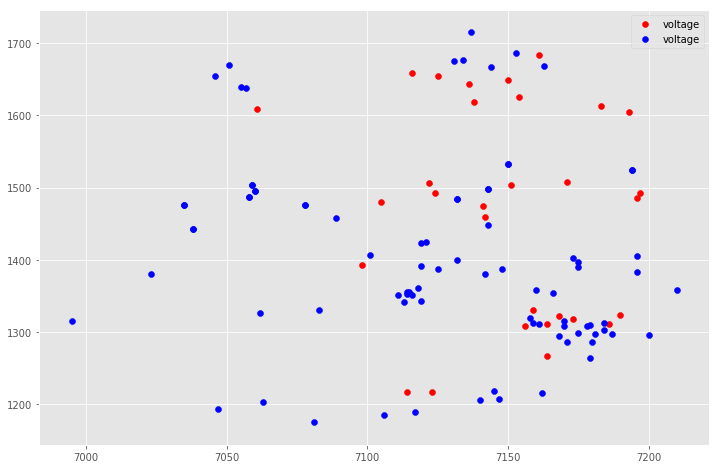

In [29]:
df00 = df[df['category']==0]
df11 = df[df['category']==1] 
plt.figure(figsize=(12,8))
plt.scatter(df00['current'],df00['voltage'],c='red')
plt.scatter(df11['current'],df11['voltage'],c='blue')

plt.legend()

# one class SVM

In [30]:
df_train = dff[['current','voltage','weld_time','category']]
df_abno = df11[['current','voltage','weld_time','category']]

In [31]:
df_train.head()

current  voltage  weld_time  category
0     8403     2059        434         0
1     8380     2030        453         0
2     8390     2041        453         0
3     8382     2003        451         0
4     8154     1524        288         0

In [32]:
df_abno.head()

current  voltage  weld_time  category
0     7147     1208        362         1
1     7181     1297        362         1
2     7175     1299        362         1
3     7200     1296        362         1
4     7187     1298        362         1

In [37]:
range1 = round(len(df_train)*0.003)
range1

29816

In [38]:
range2 = round(len(df_train)*0.001)
range2

9939

In [39]:
# Y_test 데이터프레임 만들기 (정상과 비정상 데이터를 합쳐서 카테고리만 추출)
train_feature = df_train.iloc[:range1,:]             # 정상데이터의 트레인부분(80%)부분
train_feature = train_feature.drop('category',1)     # 정상데이터의 train부분(80%)의 카테고리만 뺀 데이터프레임
Y_1 = df_train.iloc[range1:(range1+range2),3]        # 정상데이터의 test부분(20%)의 카테고리만 추출한 데이터프레임 
Y_2 = df_abno['category']                            # 비정상데이터의 카테고리만 추출한 데이터프레임
Y_test= Y_1.append(Y_2)                              # 이를 합쳐서 Y_test 데이터프레임을 생성

In [40]:
# X_test값 만들기 (정상과 비정상 데이터를 합쳐서 카테고리만 뺌)
X_test_1 = df_train.iloc[range1:(range1+range2),:].drop('category',1)# 정상데이터의 테스트부분(20%)의 카테고리만 뺀 데이터프레임
X_test_2 = df_abno.drop('category',1)                                # 비정상데이터의 카테고리만 뺀 데이터프레임 
X_test = X_test_1.append(X_test_2)                                   # 이를 합쳐서 X_test 데이터프레임을 생성

In [41]:
from sklearn import svm

In [42]:
# one class SVM의 하이퍼파라미터 세팅하기
# rbf, poly, gamma : 0.001, 0.0001, nu : 0.25, 0.5, 0.75, 0.95

oneclass = svm.OneClassSVM(kernel='rbf', gamma=0.1, nu=0.1)

In [43]:
# 테스트 피처를 가지고 알고리즘 트레이닝하기 
oneclass.fit(train_feature)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.1, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [44]:
# 테스트데이터에 알고리즘을 테스트하기
fraud_pred = oneclass.predict(X_test)

In [45]:
# 알고리즘에 의해 예측한 outliers값의 개수체크하기
unique,counts = np.unique(fraud_pred,return_counts = True)
print(np.asarray((unique,counts)).T)

[[  -1 8080]
 [   1 1945]]


In [46]:
# Y-test와 fraud_pred를 데이터프레임으로 변경하기
Y_test = Y_test.to_frame()
Y_test = Y_test.reset_index()
fraud_pred = pd.DataFrame(fraud_pred)
fraud_pred = fraud_pred.rename(columns={0:'prediction'})

In [48]:
# 모델평가 : 생성된 모델의 성능체크 
# TP : True Positives  실제값과 예측치 모두 True인 빈도
# FN : False Negatives 실제값은 True이나 False로 예측한 빈도
# FP : False Positives 실제값은 False이나 True로 예측한 빈도
# TN : True Negatives  실제값과 예측치 모두 False인 빈도 

TP = FN = FP = TN = 0

for j in range(len(Y_test)):
    if Y_test['category'][j] == 0 and fraud_pred['prediction'][j] == 1:
        TP = TP + 1
    elif Y_test['category'][j] == 0 and fraud_pred['prediction'][j] == -1:
        FN = FN + 1
    elif Y_test['category'][j] == 1 and fraud_pred['prediction'][j] == 1:
        FP = FP + 1
    else:
        TN = TN + 1
print (TP,  FN,  FP,  TN)

1945 7994 0 86


In [49]:
# 성능 매트릭스
# accuracy    : 정분류율        - 전체 관측치중 실제값과 예측치가 일치한 정도    (TP+TN)/(TP+FN+FP+TN)
# sensitivity : 민감도         - 실제값이 True인 관측치 중 예측치가 적중한 정도  TP/(TP+FN)
# recall      : 재현율(=민감도)                            
# specificity : 특이도         - 실제값이 False인 관측치 중 예측치가 적중한 정도 TN/(FP+TN)
# precision   : 정확도         - True로 예측한 관측치 중 실제값이 True인 정도   TP/(TP+FP)

accuracy = (TP+TN)/(TP+FN+FP+TN)
print(accuracy)

sensitivity = TP/(TP+FN)
print(sensitivity)

specificity = TN/(TN+FP)
print(specificity)

0.2025935162094763
0.19569373176375893
1.0


In [52]:
Y_test

index  category
0      29820         0
1      29821         0
2      29822         0
3      29823         0
4      29824         0
5      29825         0
6      29826         0
7      29827         0
8      29828         0
9      29829         0
10     29830         0
11     29831         0
12     29832         0
13     29833         0
14     29834         0
15     29835         0
16     29836         0
17     29837         0
18     29838         0
19     29839         0
20     29840         0
21     29841         0
22     29842         0
23     29843         0
24     29844         0
25     29845         0
26     29846         0
27     29847         0
28     29848         0
29     29849         0
...      ...       ...
9995       0         1
9996       1         1
9997       2         1
9998       3         1
9999       4         1
10000      5         1
10001      6         1
10002      7         1
10003      8         1
10004      9         1
10005      0         1
10006      1         1
10007      2         1
10008      3         1
10009      4         1
10010      5         1
10011      6         1
10012      7         1
10013      8         1
10014      9         1
10015      0         1
10016      1         1
10017      2         1
10018      3         1
10019      4         1
10020      5         1
10021      6         1
10022      7         1
10023      8         1
10024      9         1

[10025 rows x 2 columns]

In [51]:
fraud_pred

prediction
0              -1
1              -1
2              -1
3              -1
4              -1
5              -1
6              -1
7              -1
8              -1
9              -1
10              1
11             -1
12             -1
13             -1
14             -1
15             -1
16             -1
17             -1
18             -1
19             -1
20             -1
21             -1
22             -1
23             -1
24              1
25             -1
26             -1
27             -1
28              1
29              1
...           ...
9995           -1
9996           -1
9997           -1
9998           -1
9999           -1
10000          -1
10001          -1
10002          -1
10003          -1
10004          -1
10005          -1
10006          -1
10007          -1
10008          -1
10009          -1
10010          -1
10011          -1
10012          -1
10013          -1
10014          -1
10015          -1
10016          -1
10017          -1
10018          -1
10019          -1
10020          -1
10021          -1
10022          -1
10023          -1
10024          -1

[10025 rows x 1 columns]